In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
pi = np.pi

# Chapter 3<br>Interpolation

## 3.1 Data and Interpolating Functions

In [3]:
def Newton(point):
    points = np.array(point)
    n = len(points)
    coef_array = np.zeros(n)
    
    def coef(points):
        if len(points) == 1:
            return points[0, 1]
        return (coef(points[1:]) - coef(points[:-1])) / (points[-1, 0] - points[0, 0])

    for i in range(n):
        coef_array[i] = coef(points[:i+1])
    
    def f(x):
        y = 0
        for i in range(n):
            x_i = 1
            for k in range(0, i):
                x_i *= (x - points[k, 0])
            y += coef_array[i] * x_i
        return y
    
    return f

### Q. 1

In [4]:
x = [1960, 1970, 1980, 1990, 2000]
y = [3039585530, 3707475887, 4452584592, 5281653820, 6079603571]
points = np.array([x, y]).T

x_range = np.linspace(1960, 2000, 100)

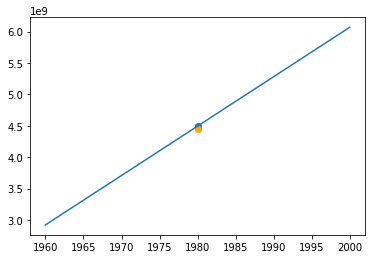

Estimate: 4494564853.50
True population: 4452584592
Error: -41980261.50


In [5]:
# (a)
f_a = Newton(points[[1, 3]])

plt.plot(x_range, f_a(x_range))
plt.scatter(x[2], f_a(x[2]))
plt.scatter(x[2], y[2], c='orange')
plt.show()

print("Estimate: %.2f" % f_a(x[2]))
print("True population: %d" % y[2])
print("Error: %.2f" % (y[2] - f_a(x[2])))

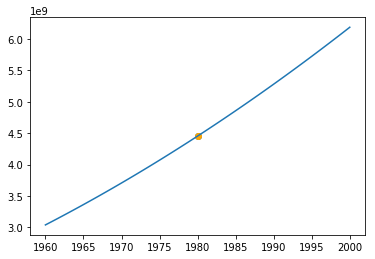

Estimate: 4454831983.67
True population: 4452584592
Error: -2247391.67


In [6]:
# (b)
f_b = Newton(points[[0, 1, 3]])

plt.plot(x_range, f_b(x_range))
plt.scatter(x[2], f_b(x[2]))
plt.scatter(x[2], y[2], c='orange')
plt.show()

print("Estimate: %.2f" % f_b(x[2]))
print("True population: %d" % y[2])
print("Error: %.2f" % (y[2] - f_b(x[2])))

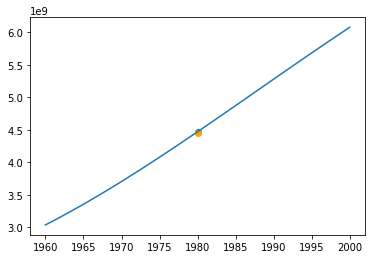

Estimate: 4472888287.83
True population: 4452584592
Error: -20303695.83


In [7]:
# (c)
f_c = Newton(points[[0, 1, 3, 4]])

plt.plot(x_range, f_c(x_range))
plt.scatter(x[2], f_c(x[2]))
plt.scatter(x[2], y[2], c='orange')
plt.show()

print("Estimate: %.2f" % f_c(x[2]))
print("True population: %d" % y[2])
print("Error: %.2f" % (y[2] - f_c(x[2])))

### Q. 2

In [8]:
def Newton(x_array, y_array):
    points = np.array([x_array, y_array]).T
    x_range = np.linspace(min(x_array), max(x_array), 100)
    n = len(points)
    coef_array = np.zeros(n)
    
    def coef(points):
        if len(points) == 1:
            return points[0, 1]
        return (coef(points[1:]) - coef(points[:-1])) / (points[-1, 0] - points[0, 0])

    for i in range(n):
        coef_array[i] = coef(points[:i+1])
    
    def f(x):
        y = 0
        for i in range(n):
            x_i = 1
            for k in range(0, i):
                x_i *= (x - points[k, 0])
            y += coef_array[i] * x_i
        return y
    
    plt.plot(x_range, f(x_range))
    plt.show()

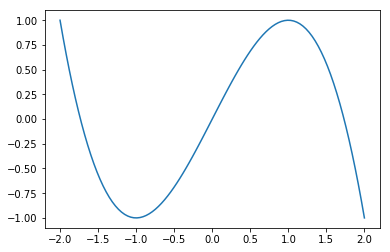

In [9]:
Newton([-2, -1, 1, 2], [1, -1, 1, -1])

### Q. 3

In [10]:
def Newton(x_array, y_array, x_0):
    points = np.array([x_array, y_array]).T
    x_range = np.linspace(min(x_array), max(x_array), 100)
    n = len(points)
    coef_array = np.zeros(n)
    
    def coef(points):
        if len(points) == 1:
            return points[0, 1]
        return (coef(points[1:]) - coef(points[:-1])) / (points[-1, 0] - points[0, 0])

    for i in range(n):
        coef_array[i] = coef(points[:i+1])
    
    def f(x):
        y = 0
        for i in range(n):
            x_i = 1
            for k in range(0, i):
                x_i *= (x - points[k, 0])
            y += coef_array[i] * x_i
        return y

    return f(x_0)

In [11]:
y_0 = Newton([-2, -1, 1, 2], [1, -1, 1, -1], 0)
print("y_0: %.4f" % y_0)

y_0: 0.0000


### Q. 4

In [12]:
f_domain = np.linspace(0, pi/2, 4)
f_image = np.cos(f_domain)

In [13]:
def cos1(x):
    x_0 = np.mod(x, 2*pi)
    sgn = 1
    
    if x_0 > pi:
        x_0 = 2*pi - x_0
    if x_0 > pi/2:
        x_0 = pi - x_0
        sgn = -1
        
    return sgn * Newton(f_domain, f_image, x_0)

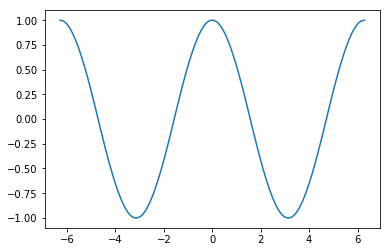

In [14]:
x_range = np.linspace(-2*pi, 2*pi, 100)
y_range = [cos1(x) for x in x_range]

plt.plot(x_range, y_range)
plt.show()

### Q. 5

In [15]:
# (a), (b) Omit.

In [16]:
# (c)
f_domain = np.linspace(0, pi/4, 4)
f_image = np.tan(f_domain)

In [17]:
def tan1(x):
    x_0 = np.mod(x, pi)
    sgn = 1
    
    if x_0 > pi/2:
        x_0 = pi - x_0
        sgn = -1
        
    if x_0 > pi/4:
        x_0 = pi/2 - x_0
        return sgn / Newton(f_domain, f_image, x_0)
    else:
        return sgn * Newton(f_domain, f_image, x_0)

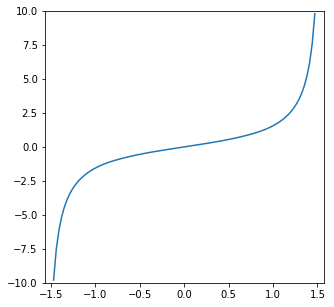

In [18]:
x_range = np.linspace(-pi/2 + 1e-1, pi/2 - 1e-1, 100)
y_range = [tan1(x) for x in x_range]

plt.figure(figsize=(5, 5))
plt.plot(x_range, y_range)
plt.axis([-pi/2, pi/2, -10, 10])
plt.show()

In [19]:
# (d)
x_range = np.linspace(0, pi/4, 1000)
y_range = np.array([tan1(x) for x in x_range])
tan_range = np.tan(x_range)

max_error = np.max(np.abs(y_range - tan_range))
print("Maximum error: %.4f" % max_error)

Maximum error: 0.0030
